In [10]:
%reload_ext autoreload
%autoreload 2


import numpy as np
from matplotlib import pyplot as plt

from utils import plotCase, loadDataSet, selectTrainingSamples, calcConfusionMatrix, calcAccuracy, plotResultDots, plotResultsOCR
from classifiers import trainMultiLayer, runMultiLayer

plt.rcParams['figure.facecolor']='white'

In [12]:
# This script will help you test your single layer neural network code
# Select which data to use:

# 1 = dot cloud 1
# 2 = dot cloud 2
# 3 = dot cloud 3
# 4 = OCR data

dataSetNr = 4; # Change this to load new data

# X - Data samples
# D - Desired output from classifier for each sample
# L - Labels for each sample
X, D, L = loadDataSet(dataSetNr)

In [13]:
# Select a subset of the training samples
numBins = 5                        # Number of bins you want to divide your data into
numSamplesPerLabelPerBin = np.inf  # Number of samples per label per bin, set to inf for max number (total number is numLabels*numSamplesPerBin)
selectAtRandom = True              # true = select samples at random, false = select the first features

# Split data into bins based on the settings above.
# The outputs are lists of length numBins, where each item is a data array. Try printing for example XBins[0].shape.
XBins, DBins, LBins = selectTrainingSamples(X, D, L, numSamplesPerLabelPerBin, numBins, selectAtRandom)

# To extract a single bin from them use e.g.:
# XBin0 = XBins[0]
# Or to combine several bins into one matrix (good for cross validataion), use the numpy function concatenate:
# XBinComb = np.concatenate(XBins[0:4])
# This example combines 4 bins, nr 0 to 3.

# Add your own code to setup data for training and test here
XTrain = np.concatenate(XBins[:4])
DTrain = np.concatenate(DBins[:4])
LTrain = np.concatenate(LBins[:4])
XTest  = XBins[-1]
DTest  = DBins[-1]
LTest  = LBins[-1]

In [14]:
len(LBins)

5

In [15]:
len(XBins[0])

1100

In [16]:
XTrain.shape

(4400, 64)

In [17]:
XTest.shape

(1100, 64)

In [18]:
# Modify the X Matrices so that a bias is added
# Note that the bias must be the last feature for the plot code to work

# The training data
XTrain = np.hstack((XTrain,np.ones([XTrain.shape[0],1], XTrain.dtype)))
# The test data
XTest = np.hstack((XTest,np.ones([XTest.shape[0],1], XTest.dtype)))

In [24]:
XTrain[0]

array([ 0,  0,  9, 12, 10,  3,  0,  0,  0,  0, 14, 16, 13, 13,  0,  0,  0,
        4, 16,  2,  1, 16,  3,  0,  0,  4, 16,  0,  0, 12,  8,  0,  0,  6,
       16,  0,  0, 15,  8,  0,  0,  5, 15,  0,  1, 16,  5,  0,  0,  2, 16,
       11, 14, 13,  0,  0,  0,  0,  8, 16, 13,  6,  0,  0,  1],
      dtype=uint8)

In [19]:
# Train your multi layer network
# Note: You need to modify trainMultiLayer() and runMultiLayer() in classifiers.py in order to train the network

if dataSetNr < 3:
    if dataSetNr == 1:
        numHidden = 2
        numIterations = 5000
    else:
        numHidden = 4
        numIterations = 6000
    learningRate  = 0.05 
    W0 = np.random.rand(XTest.shape[1],numHidden+1)     # Initialize your weight matrix W
    V0 = np.random.rand(numHidden+1, DTest.shape[1])    # Initialize your weight matrix V
else:
    if dataSetNr < 4:
        numHidden = 6
        numIterations =  7000
        learningRate  = 0.02
    else:
        numHidden = 24
        numIterations = 8000
        learningRate  = 0.02 
    np.random.seed(10)
    W0 = np.random.normal(loc = 0.0, scale = 1 / numHidden, size = (XTrain.shape[1], numHidden)) # Initialize your weight matrix W from N(0, 1/numHidden)
    W0 = np.hstack((W0, np.zeros([W0.shape[0],1], W0.dtype))) # Add zero weight for the biases
    V0 = np.random.normal(loc = 0.0, scale = 1 / numHidden, size = (numHidden+1, DTrain.shape[1]))     # Initialize your weight matrix V from N(0, 1/numHidden)
    # Info about initalization from here:  https://www.deeplearning.ai/ai-notes/initialization/+
    
# Run training loop

W, V, ErrTrain, ErrTest = trainMultiLayer(XTrain, DTrain, XTest, DTest ,W0, V0, numIterations, learningRate)

n : 0
n : 1000
n : 2000
n : 3000
n : 4000
n : 5000
n : 6000
n : 7000


Text(0, 0.5, 'Error')

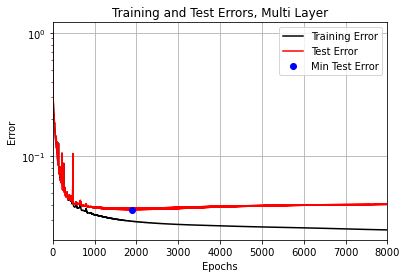

In [20]:
# Plot errors
# Note: You should not have to modify this code

# [minErrTest, minErrTestInd] = min(ErrTest);
minErrTest = ErrTest.min()
minErrTestInd = ErrTest.argmin()

plt.figure()

plt.semilogy(ErrTrain, 'k', linewidth=1.5, label='Training Error')
plt.semilogy(ErrTest, 'r', linewidth=1.5, label='Test Error')
plt.semilogy(minErrTestInd, minErrTest, 'bo', linewidth=1.5, label='Min Test Error')

plt.xlim([0,numIterations])
plt.grid('on')
plt.title('Training and Test Errors, Multi Layer')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')

In [21]:
# Calculate the Confusion Matrix and the Accuracy of the data
# Note: you have to modify the calcConfusionMatrix() and calcAccuracy() functions in utils.py yourself.

_, LPredTrain, _ = runMultiLayer(XTrain, W, V)
_, LPredTest , _ = runMultiLayer(XTest , W, V)

# The confusion matrix
cM = calcConfusionMatrix(LPredTest, LTest)

# The accuracy
acc = calcAccuracy(cM)

# Print the results
print("Confusion matrix:")
print(cM)
print(f'Accuracy: {acc:.4f}')

Confusion matrix:
[[106.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 110.   0.   0.   0.   1.   3.   0.   3.   0.]
 [  0.   0. 108.   1.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0. 103.   0.   0.   0.   1.   2.   1.]
 [  0.   0.   0.   0. 109.   0.   0.   0.   0.   1.]
 [  2.   0.   0.   0.   0. 102.   0.   0.   1.   0.]
 [  2.   0.   0.   0.   0.   2. 107.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0. 104.   0.   2.]
 [  0.   0.   1.   2.   1.   2.   0.   1. 104.   2.]
 [  0.   0.   0.   4.   0.   2.   0.   4.   0. 104.]]
Accuracy: 0.9609


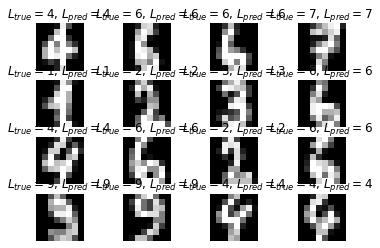

In [22]:
# Plot classifications
# Note: You should not have to modify this code

if dataSetNr < 4:
    plotResultDots(XTrain, LTrain, LPredTrain, XTest, LTest, LPredTest, 'multi', [W, V], [])
else:
    plotResultsOCR(XTest, LTest, LPredTest)